# Factoring in the k-space (essentially momentum) wave function when numerically solving a time propagated free initial wave function. 

* Zach Stewart

The Time-Dependent Schrödinger Equation is practically taught in elementary schools nowadays, but did you know that it can be rewritten to solve momentum wave packets in time? Well it can, and I'm not doing that. I'm rewriting it for wave functions in k-space, which is pretty much the same though. (The fourier transform involves less $\hbar$ constants, and since I'm a filthy theorist I would have just said $\hbar = 1$ anyway.)

Let's get the analytical stuff out of the way. The fourier transform. 

$$ \tilde{\Psi}(k,t) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} \Psi(x,t) e^{-ikx} dx $$
$$ $$
$$ \Psi(x,t) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} \tilde{\Psi}(k,t) e^{ikx} dk $$

This is essentially a transformation from a space-time wavefunction to a k-time wavefunction, and you really don't want to have to solve these analytically, if it is even possible. So that's why we solve it numerically!

In space-time, we get a numerical propagation through time by rewriting the Time-Dependent Schrödinger Equation.

$$ i \hbar \frac{\partial}{\partial t}\Psi = \frac{-\hbar^2}{2m} \frac{\partial^2}{\partial x^2} \Psi + V \Psi$$
$$ $$
$$ \frac{\partial}{\partial t}\Psi = \frac{-i}{\hbar}\big(\frac{-\hbar^2}{2m} \frac{\partial^2}{\partial x^2} \Psi + V \Psi \big)$$
$$ $$
$$ \Psi(x,t+\Delta t) = \Psi(x, t) + (\frac{\partial}{\partial t}\Psi(x, t)) \Delta t$$

It is surprisingly simple to get this working by strictly enforcing boundary conditions, but what about the momentum wave function? Well it also has a Time-Dependent Schrödinger Equation it must obey, but getting it isn't fun. For convenience, I'll shorthand the fourier transform and inverse fourier transorm as such.

$$ \tilde{\Psi} =  F(\Psi)  $$
$$ $$
$$ \Psi =  \tilde{F}(\tilde{\Psi}) $$

Then we just rewrite the TDSE by replacing $\Psi$ and V, which rely on x, and solve it.

$$ i \hbar \frac{\partial}{\partial t} \tilde{F}(\tilde{\Psi}) = \frac{-\hbar^2}{2m} \frac{\partial^2}{\partial x^2} \tilde{F}(\tilde{\Psi}) + \tilde{F}(\tilde{V}) \cdot \tilde{F}(\tilde{\Psi})$$
$$ $$
Note that...
$$ \frac{\partial^2}{\partial x^2} \tilde{F}(\tilde{\Psi}) =  \frac{\partial^2}{\partial x^2} \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} \tilde{\Psi}(k,t) e^{ikx} dk = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} \tilde{\Psi}(k,t) \frac{\partial^2}{\partial x^2} e^{ikx} dk = \frac{-k^2}{\sqrt{2\pi}} \int_{-\infty}^{\infty} \tilde{\Psi}(k,t) e^{ikx} dk = -k^2 \tilde{F}(\tilde{\Psi}) $$

Also note that, according to [Convolution Theorem](https://en.wikipedia.org/wiki/Convolution_theorem)...

$$ \tilde{F}(\tilde{V}) \cdot \tilde{F}(\tilde{\Psi}) = \tilde{F}(\tilde{V} \ast \tilde{\Psi}) = \tilde{F}(F(\tilde{F}(\tilde{V}) \cdot \tilde{F}(\tilde{\Psi}))) = \tilde{F}(F(V \Psi)) $$

Now let's go back to the TDSE...

$$ i \hbar \frac{\partial}{\partial t} \tilde{F}(\tilde{\Psi}) = \frac{\hbar^2 k^2}{2m} \tilde{F}(\tilde{\Psi}) + \tilde{F}(F(V \Psi)) $$
$$ $$
$$ \tilde{F}(i \hbar \frac{\partial}{\partial t} \tilde{\Psi}) = \tilde{F}(\frac{\hbar^2 k^2}{2m} \tilde{\Psi}) + \tilde{F}(F(V \Psi)) $$
$$ $$
$$ \tilde{F}(i \hbar \frac{\partial}{\partial t} \tilde{\Psi}) = \tilde{F}(\frac{\hbar^2 k^2}{2m} \tilde{\Psi} + F(V \Psi)) $$
$$ $$
$$ i \hbar \frac{\partial}{\partial t} \tilde{\Psi} = \frac{\hbar^2 k^2}{2m} \tilde{\Psi} + F(V \Psi) $$
$$ $$
$$ \frac{\partial}{\partial t} \tilde{\Psi} = \frac{-i}{\hbar}\big(\frac{\hbar^2 k^2}{2m} \tilde{\Psi} + F(V \Psi) \big)$$
$$ $$
$$ \frac{\partial}{\partial t} \tilde{\Psi} = \frac{-i}{\hbar}\big(\frac{\hbar^2 k^2}{2m} \tilde{\Psi} + F( \tilde{F}(\tilde{V}) \cdot \tilde{F}(\tilde{\Psi}) ) \big)$$
$$ $$
$$ \tilde{\Psi}(k,t+\Delta t) = \tilde{\Psi}(k, t) + (\frac{\partial}{\partial t}\tilde{\Psi}(k, t)) \Delta t$$

Now this, this is an analytical, and quite honestly, a numerical nightmare. Who in their right mind takes the fourier transform of a potential, and how does one do that numerically?! Well, it's called a [discrete fourier transform](https://docs.scipy.org/doc/numpy/reference/routines.fft.html), and numpy provides us with the means to do it easily, well, ish.

$$ \tilde{\Psi}_m =  \sum_{n=0}^{N-1} \Psi_n e^{-2 \pi i m n / N} = DFT(\Psi)  $$
$$ $$
$$ \Psi_n = \frac{1}{N} \sum_{m=0}^{N-1} \tilde{\Psi}_m e^{2 \pi i m n / N} = IDFT(\tilde{\Psi}) $$

Where 
 - n is the index of elements in the x-space function
 - m is the index of elements in the k-space function
 - N is the number of elements in BOTH FUNCTIONS
 
Which is all well and good, but it doesn't relate to the analytical form in a obvious way. So, we need to define how they are related. And that involves some good ol' rewriting.

First, let's define some things for convenience.

$$ \Delta x = \frac{x_{-1} - x_0}{N}  $$
$$ $$
$$ x_n = x_0 + n \Delta x $$
$$ $$
$$ \Delta k = \frac{2 \pi}{N \Delta x} $$
$$ $$
$$ k_n = k_0 + m \Delta k $$

Now, this is important, as it showcases the limitations of discrete fourier transform. Because the k space has to be bounded, we can only account for a range of possible momenta, and if your momenta falls outside that range (let's say the frequency is too high) it will not be possible to correctly factor it in to the numerical expression. Another annoying thing about DFT is that you can't account for wave contribution from waves that have more oscillations than the number of grid points you are using. Now, the de Broglie equation tells us that $ |k| = 2 \pi f $, and DFT has a hard limit on the possible frequency of waves based off your number of grid points, meaning that possible k contributions are heavily related to the number of grid points used.

What I am essentially saying is that very large k values are a no go for this kind of simulation, and because of how we'll enforce $\Delta k$, the range of allowed k values is proportional to the range of allowed x values. It sucks, but it allows us to really simplify the problem later. You can however choose $k_0$ based on what you expect the problem to be like. Since I will be modeling a scattering problem, I'll choose k centered around 0, so my $k_0$ is...

$$ k_0 = \frac{-\pi}{N \Delta x} = \frac{-\pi}{x_{-1} - x_0} $$

( Honestly you can define the k space and $\Delta k$ however you want, it's just that this specific $\Delta k$ allows for some convenient rewriting, and because of that, this entire simulation revolves around this specific $\Delta k$. Also, due to the nature of DFT, the left side and the right side essentially give you information about the direction of traveling wave packets (as the fourier transform is forced to be periodic when put back to back, because waves). If you have a poorly chosen k-space, what should have been a negative k will be modeled as a much more positive k, etc... which is numerically correct but fundamentally wrong. Before choosing a k-space, think about the range of k you would see in a classical system, and choose bounds which generously encompass it. )

DFT is a fickle beast, and you have been warned.

Also, because I'll use it soon, note that $ \Delta k \Delta x = 2 \pi/N$

Now, lets start with the analytical fourier transform.

$$ \tilde{\Psi}(k,t) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} \Psi(x,t) e^{-i k x} dx $$
$$ $$
Numerical integration tells us that...

$$ \tilde{\Psi}(k,t) \approx \frac{1}{\sqrt{2\pi}} \sum_{n=0}^{N-1} \Psi(x_n,t) e^{-i k x_n} \Delta x $$
$$ $$
And more specifically that...

$$ \tilde{\Psi}(k_m,t) \approx \frac{1}{\sqrt{2\pi}} \sum_{n=0}^{N-1} \Psi(x_n,t) e^{-i k_m x_n} \Delta x $$
$$ $$
Rewriting $x_n$ and $k_n$, we see that...

$$ e^{-i k_m x_n} = e^{-i (k_0 + m \Delta k) (x_0 + n \Delta x)} = e^{-i k_0 x_0} e^{-i k_0 n \Delta x} e^{-i m x_0 \Delta k} e^{-i m n \Delta x \Delta k} = e^{-i k_0 x_n} e^{-i m x_0 \Delta k} e^{-2 \pi i m n / N} $$
$$ $$
So...

$$ \tilde{\Psi}(k_m,t) \approx \frac{\Delta x}{\sqrt{2\pi}} e^{-i m x_0 \Delta k} \sum_{n=0}^{N-1} (\Psi(x_n,t) e^{-i k_0 x_n} ) e^{-2 \pi i m n / N} = \frac{\Delta x}{\sqrt{2\pi}} e^{-i m x_0 \Delta k} DFT(\Psi(x_n,t) e^{-i k_0 x_n} ) $$

Sweet, we can get a discrete momentum vector with some approximation, and we can do it using numpy's built in fast fourier transform easily. We can also convert back using the following... 

$$ {\Psi}(x_n,t) \approx \frac{\sqrt{2\pi}}{\Delta k} e^{i n k_0 \Delta x} IDFT(\tilde{\Psi}(k_m,t) e^{i k_m x_0}) $$

Feel free to derive it yourself as an exercise. 

Now... why do this? Great question. Due to the nature of numerical time propagations, the more you propagate in space or k, the more you tend to deviate from the other propagation. This is a pretty big problem, as both the space and k TDSE must be satisfied if the solution is correct. This problem can be alleviated by essentially splitting the difference, and alternating the propagation in space and time. Which is what I do near the end of the notebook, with half a time step in space, and then half a time step in k. The result gives a compromise between the differing answers given by just propagating in space or propagating in k.

(I've seen an example online that treats this like a split operator propagation, which is fundamentally wrong, as the space and k propagation aren't separate contributions. They are one and the same, and treating this like a split-operator will be a waste of computational effort and also cause 2 propagations per time step.)

In [1]:
from numpy import *
import matplotlib.pyplot as plt
from scipy import linalg, integrate
import numpy as np
from IPython.display import display, clear_output
import time  
from numpy.fft import *
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

In [2]:
im = 0+1j
hbar = 1.05457e-34

In [3]:
def dinteg(x,y):
    dx = x[1]-x[0]
    return sum((y[:-1] + y[1:])*(dx/2))

def simpsons(x,y):
    dx = x[1]-x[0]
    return sum((y[:-1] + y[1:])*(dx/2))

def deriv(x,y):
    dx = x[1]-x[0]
    return (y[2:]-y[:-2])/(2*dx)

def deriv2(x,y):
    dx = x[1]-x[0]
    ypp = y.copy()
    ypp[0] = 0
    ypp[-1] = 0
    ypp[1:-1] = (y[:-2] - 2*y[1:-1] + y[2:])/(dx**2)
    return ypp

In [4]:
def Normalize(x,Psi, screens=2):
    for i in range(screens):
        A = 1/sqrt(dinteg(x,conj(Psi)*Psi))
        Psi *= A
    return Psi

def BC(Psi, nodes=[0,-1]):
    Psi[nodes] = 0
    return Psi

In [5]:
def x2k(x, k, Psi, n):
    dx = x[1]-x[0]
    dk = k[1]-k[0]
    return fft(Psi * exp(-im*k[0]*x)) * (dx/sqrt(2*pi)) * exp(-im*n*x[0]*dk) 

def k2x(x, k, Psi2, n):
    dx = x[1]-x[0]
    dk = k[1]-k[0]
    return BC(ifft(Psi2 * exp(im*k*x[0])) * (sqrt(2*pi)/dk) * exp(im*k[0]*n*dx))

In [6]:
hbar = 1.
m = 1.

# Space-time progression x-space

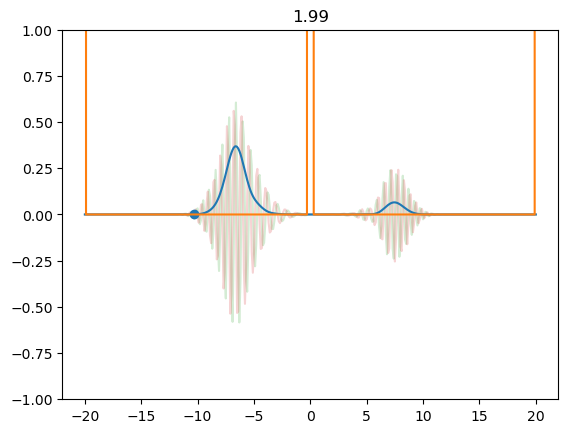

<Figure size 640x480 with 0 Axes>

In [7]:
x = linspace(-20,20,401)
dx = x[1]-x[0]
t = linspace(0,2,200001)
dt = t[1]-t[0]
k = linspace(-pi/dx, pi/dx, 401)
dk = k[1]-k[0]
n = linspace(0, len(x)-1, len(x), dtype=int)

r0 = -10
k0 = 10

Psi = 0 * im * x
Psi += exp(-1*(x-r0)**2)*exp(im*x*(k0))
Psi[0] = 0
Psi[-1] = 0

V = Psi*0 #+ x*x*.01
V[198:203] = 50
V[:1] = 1e6
V[-1:] = 1e6

r = r0
v = k0 * hbar/m

Psi = Normalize(x,Psi)

fig, ax = plt.subplots()

#Psi2 = Normalize(k, x2k(x, k, Psi, n))

ax.plot(x,real(conj(Psi)*Psi))
ax.plot(x,V)
ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
ax.scatter(r, 0)
ax.set_ylim(-1,1)
for i in range(len(t)):
    if (i%1000) == 0:
        clear_output(wait=True) 
        display(fig)            
        ax.clear()        
        time.sleep(0.0001)
        
    ddxxPsi = deriv2(x,Psi)
    Psi += (-im/hbar)*((((-hbar**2)/(2*m))*ddxxPsi)+(V*Psi))*dt
    Psi = Normalize(x, Psi)
    
    if v > 0 and r >= -.2:
        v = -v
    if v < 0 and r <= -20:
        v = -v
#     if v > 0 and r >= 20:
#         v = -v
#     if v < 0 and r <= .2:
#         v = -v
    r += v*dt
    
#     Psi2 = Normalize(k, x2k(x, k, Psi, n))
        
    if (i%1000) == 0:
        ax.set_title("{:.2f}".format(t[i]))
        ax.plot(x,real(conj(Psi)*Psi))
        ax.plot(x,V)
        ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
        ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
        ax.scatter(r, 0)
        ax.set_ylim(-1,1)
fig.clear()

In [46]:
States = zeros((10,4001))*im
States[0]

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

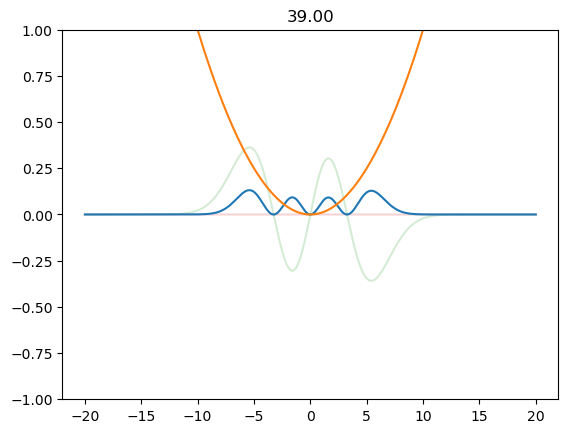

<Figure size 640x480 with 0 Axes>

In [67]:
x = linspace(-20,20,4001)
dx = x[1]-x[0]
t = linspace(0,40,4000001)
dt = t[1]-t[0]
# k = linspace(-pi/dx, pi/dx, 401)
# dk = k[1]-k[0]
# n = linspace(0, len(x)-1, len(x), dtype=int)

Psi = 0 * im * x
Psi += exp(-.1*(x)**2)*(sin(x)+cos(x))
Psi[:10] = 0
Psi[-10:] = 0

V = Psi*0 + x*x*.01 
V[:1] = 1e10
V[-1:] = 1e10


# r = r0
# v = k0 * hbar/m

Psi = Normalize(x,Psi)
Psi -= dinteg(x, States[0].conj()*Psi)*States[0]
Psi -= dinteg(x, States[1].conj()*Psi)*States[1]
Psi -= dinteg(x, States[2].conj()*Psi)*States[2]
Psi = Normalize(x,Psi)


fig, ax = plt.subplots()

#Psi2 = Normalize(k, x2k(x, k, Psi, n))

ax.plot(x,real(conj(Psi)*Psi))
ax.plot(x,V)
ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
# ax.scatter(r, 0)
ax.set_ylim(-1,1)
for i in range(len(t)):
    if (i%100000) == 0:
        clear_output(wait=True) 
        display(fig)            
        ax.clear()        
        time.sleep(0.1)
        
    ddxxPsi = deriv2(x,Psi)
    Psi += (-1/hbar)*((((-hbar**2)/(2*m))*ddxxPsi)+(V*Psi))*dt
#     Psi = Normalize(x, Psi)
    
#     if v > 0 and r >= -.2:
#         v = -v
#     if v < 0 and r <= -20:
#         v = -v
# #     if v > 0 and r >= 20:
# #         v = -v
# #     if v < 0 and r <= .2:
# #         v = -v
#     r += v*dt
    
#     Psi2 = Normalize(k, x2k(x, k, Psi, n))
        
    if (i%100000) == 0:
        Psi = Normalize(x, Psi)
        Psi -= dinteg(x, States[0].conj()*Psi)*States[0]
        Psi -= dinteg(x, States[1].conj()*Psi)*States[1]
        Psi -= dinteg(x, States[2].conj()*Psi)*States[2]
        Psi = Normalize(x,Psi)
        ax.set_title("{:.2f}".format(t[i]))
        ax.plot(x,real(conj(Psi)*Psi))
        ax.plot(x,V)
        ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
        ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
#         ax.scatter(r, 0)
        ax.set_ylim(-1,1)
fig.clear()
States[3] = Psi

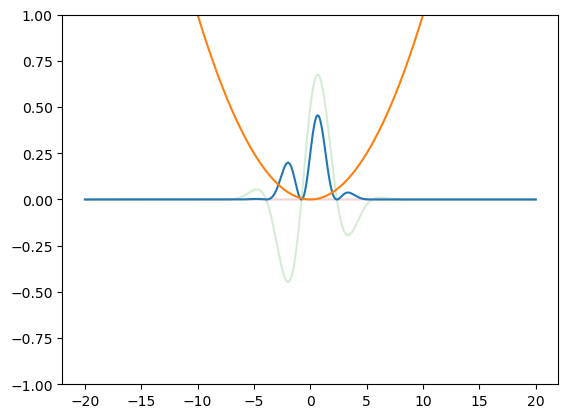

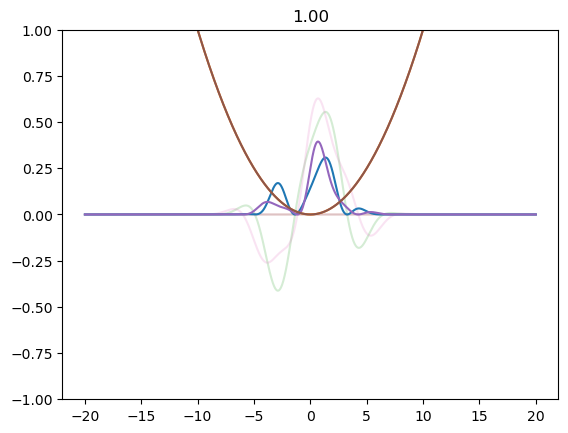

<Figure size 640x480 with 0 Axes>

In [119]:
x = linspace(-20,20,4001)
dx = x[1]-x[0]
t = linspace(0,1,2)
dt = t[1]-t[0]
# k = linspace(-pi/dx, pi/dx, 401)
# dk = k[1]-k[0]
# n = linspace(0, len(x)-1, len(x), dtype=int)

Psi = 0 * im * x
Psi += exp(-.1*(x)**2)*(sin(x)+cos(x))
Psi[:1] = 0
Psi[-1:] = 0

V = Psi*0 + x*x*.01 
V[:1] = 1e10
V[-1:] = 1e10


# r = r0
# v = k0 * hbar/m

Psi = Normalize(x,Psi)
# Psi -= dinteg(x, States[0].conj()*Psi)*States[0]
# Psi -= dinteg(x, States[1].conj()*Psi)*States[1]
# Psi -= dinteg(x, States[2].conj()*Psi)*States[2]
Psi = Normalize(x,Psi)


fig, ax = plt.subplots()

#Psi2 = Normalize(k, x2k(x, k, Psi, n))

ax.plot(x,real(conj(Psi)*Psi))
ax.plot(x,V)
ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
# ax.scatter(r, 0)
ax.set_ylim(-1,1)
for i in range(2):
    if (i%100000) == 0:
        clear_output(wait=True) 
        display(fig)            
        ax.clear()        
        time.sleep(0.1)
        
    ddxxPsi = deriv2(x,Psi)
    Psi += (-1/hbar)*((((-hbar**2)/(2*m))*ddxxPsi)+(V*Psi))*dt
#     Psi = Normalize(x, Psi)
    
#     if v > 0 and r >= -.2:
#         v = -v
#     if v < 0 and r <= -20:
#         v = -v
# #     if v > 0 and r >= 20:
# #         v = -v
# #     if v < 0 and r <= .2:
# #         v = -v
#     r += v*dt
    
#     Psi2 = Normalize(k, x2k(x, k, Psi, n))
        
    if (i%100000) == 0:
        Psi = Normalize(x, Psi)
#         Psi -= dinteg(x, States[0].conj()*Psi)*States[0]
#         Psi -= dinteg(x, States[1].conj()*Psi)*States[1]
#         Psi -= dinteg(x, States[2].conj()*Psi)*States[2]
        Psi = Normalize(x,Psi)
        ax.set_title("{:.2f}".format(t[i]))
        ax.plot(x,real(conj(Psi)*Psi))
        ax.plot(x,V)
        ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
        ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
#         ax.scatter(r, 0)
        ax.set_ylim(-1,1)
Psi = Normalize(x,Psi)
ax.set_title("{:.2f}".format(t[1]))
ax.plot(x,real(conj(Psi)*Psi))
ax.plot(x,V)
ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
display(fig) 

# States[3] = Psi

In [95]:
StatesA = zeros((10,4001))*im
StatesA[0]

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

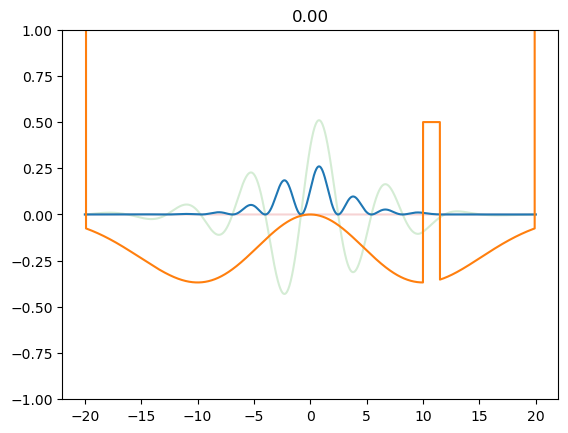

KeyboardInterrupt: 

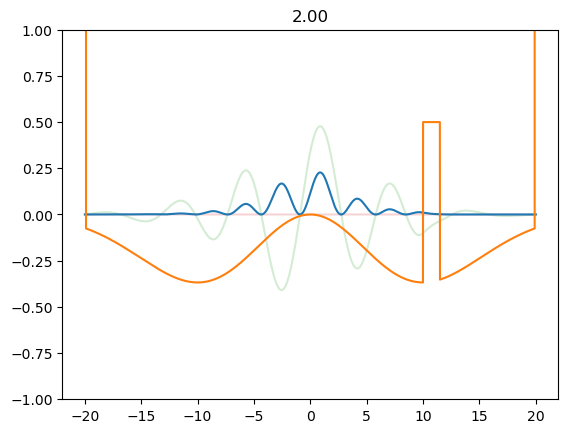

In [121]:
x = linspace(-20,20,4001)
dx = x[1]-x[0]
t = linspace(0,100,1000001)
dt = t[1]-t[0]
print(dt)
# k = linspace(-pi/dx, pi/dx, 401)
# dk = k[1]-k[0]
# n = linspace(0, len(x)-1, len(x), dtype=int)

Psi = 0 * im * x
Psi += exp(-.02*(x)**2)*(sin(x)+cos(x))
Psi[:10] = 0
Psi[-10:] = 0

# Psi = StatesA[7]

V = Psi*0 + (x*x*.01)*(-exp(-.01*(x-0.0)**2)) 
V[3000:3150] = 0.5
V[:10] = 1e10
V[-10:] = 1e10


# r = r0
# v = k0 * hbar/m

Psi = Normalize(x,Psi)
Psi -= dinteg(x, StatesA[0].conj()*Psi)*StatesA[0]
Psi -= dinteg(x, StatesA[1].conj()*Psi)*StatesA[1]
Psi -= dinteg(x, StatesA[2].conj()*Psi)*StatesA[2]
Psi -= dinteg(x, StatesA[3].conj()*Psi)*StatesA[3]
Psi -= dinteg(x, StatesA[4].conj()*Psi)*StatesA[4]
Psi -= dinteg(x, StatesA[5].conj()*Psi)*StatesA[5]
Psi -= dinteg(x, StatesA[6].conj()*Psi)*StatesA[6]
Psi -= dinteg(x, StatesA[7].conj()*Psi)*StatesA[7]
Psi -= dinteg(x, StatesA[8].conj()*Psi)*StatesA[8]
Psi -= dinteg(x, StatesA[9].conj()*Psi)*StatesA[9]
Psi = Normalize(x,Psi)
Psi[:10] = 0
Psi[-10:] = 0


fig, ax = plt.subplots()

#Psi2 = Normalize(k, x2k(x, k, Psi, n))

ax.plot(x,real(conj(Psi)*Psi))
ax.plot(x,V)
ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
# ax.scatter(r, 0)
ax.set_ylim(-1,1)
for i in range(len(t)):
    if (i%20000) == 0:
        clear_output(wait=True) 
        display(fig)            
        ax.clear()        
        time.sleep(0.1)
        
    ddxxPsi = deriv2(x,Psi)
    Psi += (-1/hbar)*((((-hbar**2)/(2*m))*ddxxPsi)+(V*Psi))*dt
    Psi[:10] = 0
    Psi[-10:] = 0
#     Psi = Normalize(x, Psi)
    
#     if v > 0 and r >= -.2:
#         v = -v
#     if v < 0 and r <= -20:
#         v = -v
# #     if v > 0 and r >= 20:
# #         v = -v
# #     if v < 0 and r <= .2:
# #         v = -v
#     r += v*dt
    
#     Psi2 = Normalize(k, x2k(x, k, Psi, n))
        
    if (i%20000) == 0:
        Psi = Normalize(x, Psi)
        Psi -= dinteg(x, StatesA[0].conj()*Psi)*StatesA[0]
        Psi -= dinteg(x, StatesA[1].conj()*Psi)*StatesA[1]
        Psi -= dinteg(x, StatesA[2].conj()*Psi)*StatesA[2]
        Psi -= dinteg(x, StatesA[3].conj()*Psi)*StatesA[3]
        Psi -= dinteg(x, StatesA[4].conj()*Psi)*StatesA[4]
        Psi -= dinteg(x, StatesA[5].conj()*Psi)*StatesA[5]
        Psi -= dinteg(x, StatesA[6].conj()*Psi)*StatesA[6]
        Psi -= dinteg(x, StatesA[7].conj()*Psi)*StatesA[7]
        Psi -= dinteg(x, StatesA[8].conj()*Psi)*StatesA[8]
        Psi -= dinteg(x, StatesA[9].conj()*Psi)*StatesA[9]
        Psi = Normalize(x,Psi)
        ax.set_title("{:.2f}".format(t[i]))
        ax.plot(x,real(conj(Psi)*Psi))
        ax.plot(x,V)
        ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
        ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
#         ax.scatter(r, 0)
        ax.set_ylim(-1,1)
fig.clear()
# StatesA[9] = Psi

In [122]:
dt

0.0001

[-0.+0.j -0.+0.j -0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
[-0.+0.j -0.+0.j -0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]


(-1.0, 1.0)

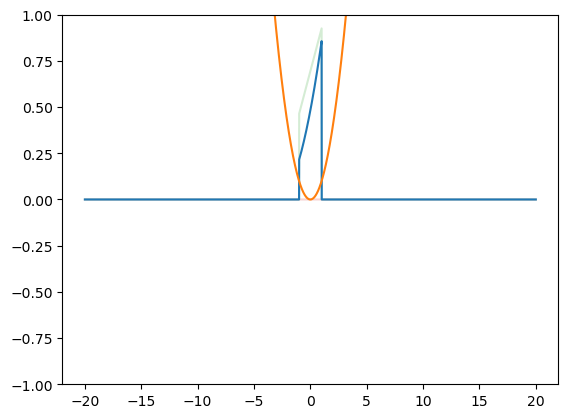

In [53]:
x = linspace(-20,20,40001)
dx = x[1]-x[0]
t = linspace(0,400,40001)
dt = t[1]-t[0]
# k = linspace(-pi/dx, pi/dx, 401)
# dk = k[1]-k[0]
# n = linspace(0, len(x)-1, len(x), dtype=int)

Psi = 0 * im * x
Psi[19000:21001] += x[19000:21001]+3 #exp(-.01*(x-r0)**2)*exp(im*x*(k0))
# Psi[0] = 0
# Psi[-1] = 0

V = Psi*0 + x*x*.1 


# r = r0
# v = k0 * hbar/m
print(Psi)
Psi = Normalize(x,Psi)

print(Psi)

fig, ax = plt.subplots()

#Psi2 = Normalize(k, x2k(x, k, Psi, n))

ax.plot(x,real(conj(Psi)*Psi))
ax.plot(x,V)
ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
# ax.scatter(r, 0)
ax.set_ylim(-1,1)

# fig.clear()

In [9]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

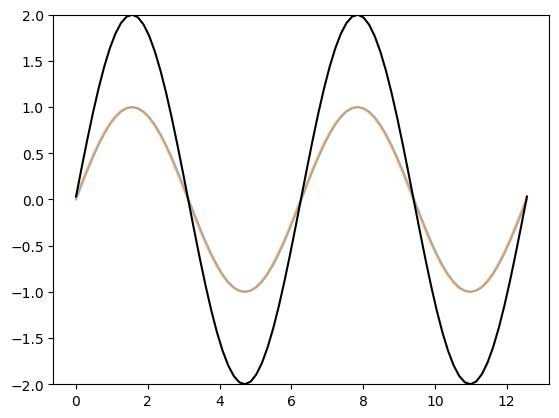

<Figure size 640x480 with 0 Axes>

In [10]:
x = linspace(0,4*pi,81)
dx = x[1]-x[0]
t = linspace(0,4*pi,401)
dt = t[1]-t[0]

fig, ax = plt.subplots()

for i in t:
    clear_output(wait=True) 
    display(fig)            
    ax.clear()        
    time.sleep(0.0001)
    
    y1 = sin(x)
    y2 = sin(x-i)
    y3 = y1+y2
    
    ax.plot(x,y1,alpha=0.5)
    ax.plot(x,y2,alpha=0.5)
    ax.plot(x,y3, "k")
    ax.set_ylim(-2,2)
    
fig.clear()

# Space-time progression k-space

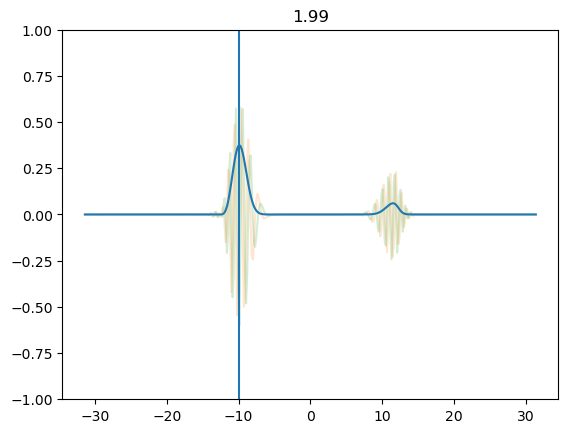

<Figure size 640x480 with 0 Axes>

In [11]:
x = linspace(-20,20,401)
dx = x[1]-x[0]
t = linspace(0,2,200001)
dt = t[1]-t[0]
k = linspace(-pi/dx, pi/dx, 401)
dk = k[1]-k[0]
n = linspace(0, len(x)-1, len(x), dtype=int)

r0 = -10
k0 = 10

Psi = 0 * im * x
Psi += exp(-1*(x-r0)**2)*exp(im*x*(k0))
Psi[0] = 0
Psi[-1] = 0

V = Psi*0
V[198:203] = 50
V[:1] = 1e6
V[-1:] = 1e6

r = r0
v = k0 * hbar/m

Psi = Normalize(x,Psi)

fig, ax = plt.subplots()

Psi2 = Normalize(k, x2k(x, k, Psi, n))

ax.plot(k,real(conj(Psi2)*Psi2))
# ax.plot(x,V)
ax.plot(k,real(Psi2), zorder=-1, alpha=0.2)
ax.plot(k,imag(Psi2), zorder=-1, alpha=0.2)
ax.vlines(v*m/hbar, -1, 1)
ax.set_ylim(-1,1)
for i in range(len(t)):
    if (i%1000) == 0:
        clear_output(wait=True) 
        display(fig)            
        ax.clear()        
        time.sleep(0.0001)
        
    ddxxPsi = deriv2(x,Psi)
    Psi += (-im/hbar)*((((-hbar**2)/(2*m))*ddxxPsi)+(V*Psi))*dt
    Psi = Normalize(x, Psi)
    
    if v > 0 and r >= -.2:
        v = -v
    if v < 0 and r <= -20:
        v = -v
#     if v > 0 and r >= 20:
#         v = -v
#     if v < 0 and r <= -.2:
#         v = -v    
    r += v*dt
        
    if (i%1000) == 0:
        Psi2 = Normalize(k, x2k(x, k, Psi, n))
        ax.set_title("{:.2f}".format(t[i]))
        ax.plot(k,real(conj(Psi2)*Psi2))
#         ax.plot(x,V)
        ax.plot(k,real(Psi2), zorder=-1, alpha=0.2)
        ax.plot(k,imag(Psi2), zorder=-1, alpha=0.2)
        ax.vlines(v*m/hbar, -1, 1)
        ax.set_ylim(-1,1)
fig.clear()

# k time progression x-space

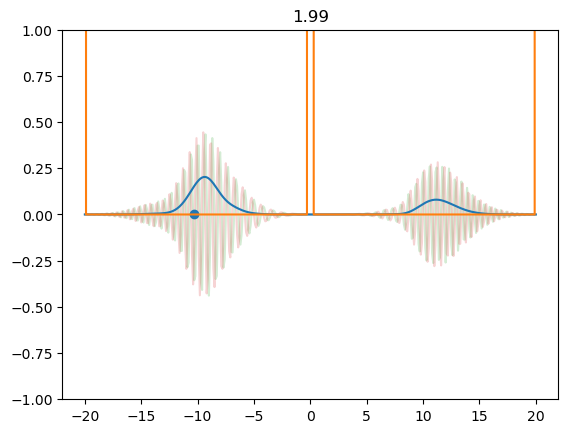

<Figure size 640x480 with 0 Axes>

In [12]:
x = linspace(-20,20,401)
dx = x[1]-x[0]
t = linspace(0,2,200001)
dt = t[1]-t[0]
k = linspace(-pi/dx, pi/dx, 401)
dk = k[1]-k[0]
n = linspace(0, len(x)-1, len(x), dtype=int)

r0 = -10
v0 = 10

Psi = 0 * im * x
Psi += exp(-1*(x-r0)**2)*exp(im*x*(k0))
Psi[0] = 0
Psi[-1] = 0

V = Psi*0
V[198:203] = 50
V[:1] = 1e6
V[-1:] = 1e6

r = r0
v = k0 * hbar/m

Psi = Normalize(x,Psi)

fig, ax = plt.subplots()

Psi2 = Normalize(k, x2k(x, k, Psi, n))

ax.plot(x,real(conj(Psi)*Psi))
ax.plot(x,V)
ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
ax.scatter(r, 0)
ax.set_ylim(-1,1)
for i in range(len(t)):
    if (i%1000) == 0:
        clear_output(wait=True) 
        display(fig)            
        ax.clear()        
        time.sleep(0.0001)
           
    Psi = Normalize(x, k2x(x, k, Psi2, n))
        
    Conv = x2k(x, k, Psi * V, n)
    Psi2 -= (im/hbar)*(( ((hbar**2)*(k**2)/(2*m))*Psi2 + Conv ))*dt
    
    if v > 0 and r >= -.2:
        v = -v
    if v < 0 and r <= -20:
        v = -v
#     if v > 0 and r >= 20:
#         v = -v
#     if v < 0 and r <= -.2:
#         v = -v
    r += v*dt
       
    if (i%1000) == 0:
        Psi = Normalize(x, k2x(x, k, Psi2, n))
        ax.set_title("{:.2f}".format(t[i]))
        ax.plot(x,real(conj(Psi)*Psi))
        ax.plot(x,V)
        ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
        ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
        ax.scatter(r, 0)
        ax.set_ylim(-1,1)
fig.clear()

# k time propagation k-space

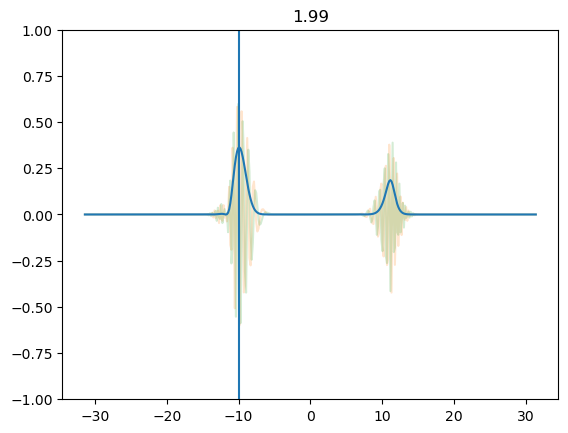

<Figure size 640x480 with 0 Axes>

In [13]:
x = linspace(-20,20,401)
dx = x[1]-x[0]
t = linspace(0,2,200001)
dt = t[1]-t[0]
k = linspace(-pi/dx, pi/dx, 401)
dk = k[1]-k[0]
n = linspace(0, len(x)-1, len(x), dtype=int)

r0 = -10
v0 = 10

Psi = 0 * im * x
Psi += exp(-1*(x-r0)**2)*exp(im*x*(k0))
Psi[0] = 0
Psi[-1] = 0

V = Psi*0
V[198:203] = 50
V[:1] = 1e6
V[-1:] = 1e6

r = r0
v = k0 * hbar/m

Psi = Normalize(x,Psi)

fig, ax = plt.subplots()

Psi2 = Normalize(k, x2k(x, k, Psi, n))

ax.plot(k,real(conj(Psi2)*Psi2))
# ax.plot(x,V)
ax.plot(k,real(Psi2), zorder=-1, alpha=0.2)
ax.plot(k,imag(Psi2), zorder=-1, alpha=0.2)
ax.vlines(v*m/hbar, -1, 1)
ax.set_ylim(-1,1)
for i in range(len(t)):
    if (i%1000) == 0:
        clear_output(wait=True) 
        display(fig)            
        ax.clear()        
        time.sleep(0.0001)
           
    Psi = Normalize(x, k2x(x, k, Psi2, n))
        
    Conv = x2k(x, k, Psi * V, n)
    Psi2 -= (im/hbar)*(( ((hbar**2)*(k**2)/(2*m))*Psi2 + Conv ))*dt
    
    if v > 0 and r >= -.2:
        v = -v
    if v < 0 and r <= -20:
        v = -v
#     if v > 0 and r >= 20:
#         v = -v
#     if v < 0 and r <= -.2:
#         v = -v
    r += v*dt

    if (i%1000) == 0:
        #ax.plot(x,Conv)
        ax.set_title("{:.2f}".format(t[i]))
        ax.plot(k,real(conj(Psi2)*Psi2))
#         ax.plot(x,V)
        ax.plot(k,real(Psi2), zorder=-1, alpha=0.2)
        ax.plot(k,imag(Psi2), zorder=-1, alpha=0.2)
        ax.vlines(v*m/hbar, -1, 1)
        ax.set_ylim(-1,1)
fig.clear()

# Alternating Progression X-Space

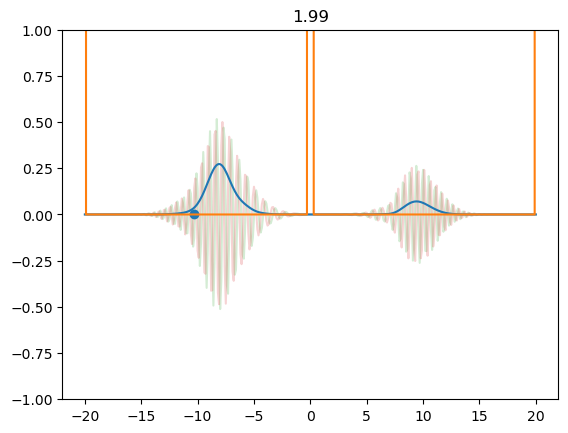

<Figure size 640x480 with 0 Axes>

In [14]:
x = linspace(-20,20,401)
dx = x[1]-x[0]
t = linspace(0,2,200001)
dt = t[1]-t[0]
k = linspace(-pi/dx, pi/dx, 401)
dk = k[1]-k[0]
n = linspace(0, len(x)-1, len(x), dtype=int)

r0 = -10
v0 = 10

Psi = 0 * im * x
Psi += exp(-1*(x-r0)**2)*exp(im*x*(k0))
Psi[0] = 0
Psi[-1] = 0

V = Psi*0
V[198:203] = 50
V[:1] = 1e6
V[-1:] = 1e6

r = r0
v = k0 * hbar/m

Psi = Normalize(x,Psi)

fig, ax = plt.subplots()

#Psi2 = Normalize(k, x2k(x, k, Psi, n))

ax.plot(x,real(conj(Psi)*Psi))
ax.plot(x,V)
ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
ax.scatter(r, 0)
ax.set_ylim(-1,1)
for i in range(len(t)):
    if (i%1000) == 0:
        clear_output(wait=True) 
        display(fig)            
        ax.clear()        
        time.sleep(0.0001)
        
    ddxxPsi = deriv2(x,Psi)
    Psi += (-im/hbar)*((((-hbar**2)/(2*m))*ddxxPsi)+(V*Psi))*dt/2
    Psi = Normalize(x, Psi)
    
    Psi2 = Normalize(k, x2k(x, k, Psi, n))
        
    Conv = x2k(x, k, Psi * V, n)
    Psi2 -= (im/hbar)*(( ((hbar**2)*(k**2)/(2*m))*Psi2 + Conv ))*dt/2
    
    Psi = Normalize(x, k2x(x, k, Psi2, n))
    
    if v > 0 and r >= -.2:
        v = -v
    if v < 0 and r <= -20:
        v = -v
#     if v > 0 and r >= 20:
#         v = -v
#     if v < 0 and r <= -.2:
#         v = -v
    r += v*dt
    
#     Psi2 = Normalize(k, x2k(x, k, Psi, n))
    
    #print(t[i])
    if (i%1000) == 0:
        #ax.plot(x,Conv)
        ax.set_title("{:.2f}".format(t[i]))
        ax.plot(x,real(conj(Psi)*Psi))
        ax.plot(x,V)
        ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
        ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
        ax.scatter(r, 0)
        ax.set_ylim(-1,1)
fig.clear()

# Alternating Progression K-Space

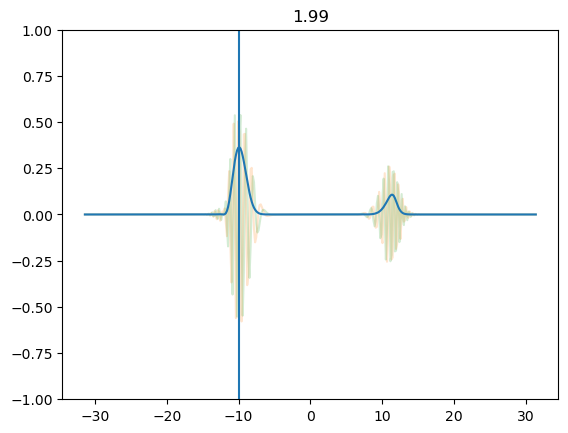

<Figure size 640x480 with 0 Axes>

In [15]:
x = linspace(-20,20,401)
dx = x[1]-x[0]
t = linspace(0,2,200001)
dt = t[1]-t[0]
k = linspace(-pi/dx, pi/dx, 401)
dk = k[1]-k[0]
n = linspace(0, len(x)-1, len(x), dtype=int)

r0 = -10
v0 = 10

Psi = 0 * im * x
Psi += exp(-1*(x-r0)**2)*exp(im*x*(k0))
Psi[0] = 0
Psi[-1] = 0

V = Psi*0
V[198:203] = 50
V[:1] = 1e6
V[-1:] = 1e6

r = r0
v = k0 * hbar/m

Psi = Normalize(x,Psi)

fig, ax = plt.subplots()

Psi2 = Normalize(k, x2k(x, k, Psi, n))

ax.plot(k,real(conj(Psi2)*Psi2))
#ax.plot(x,V)
ax.plot(k,real(Psi2), zorder=-1, alpha=0.2)
ax.plot(k,imag(Psi2), zorder=-1, alpha=0.2)
ax.vlines(v*m/hbar, -1, 1)
ax.set_ylim(-1,1)
for i in range(len(t)):
    if (i%1000) == 0:
        clear_output(wait=True) 
        display(fig)            
        ax.clear()        
        time.sleep(0.0001)
        
    ddxxPsi = deriv2(x,Psi)
    Psi += (-im/hbar)*((((-hbar**2)/(2*m))*ddxxPsi)+(V*Psi))*dt/2
    Psi = Normalize(x, Psi)
    
    Psi2 = Normalize(k, x2k(x, k, Psi, n))
        
    Conv = x2k(x, k, Psi * V, n)
    Psi2 -= (im/hbar)*(( ((hbar**2)*(k**2)/(2*m))*Psi2 + Conv ))*dt/2
    
    Psi = Normalize(x, k2x(x, k, Psi2, n))
    
    if v > 0 and r >= -.2:
        v = -v
    if v < 0 and r <= -20:
        v = -v
#     if v > 0 and r >= 20:
#         v = -v
#     if v < 0 and r <= -.2:
#         v = -v
    r += v*dt
    
    if (i%1000) == 0:
        Psi2 = Normalize(k, x2k(x, k, Psi, n))
        ax.set_title("{:.2f}".format(t[i]))
        ax.plot(k,real(conj(Psi2)*Psi2))
        #ax.plot(x,V)
        ax.plot(k,real(Psi2), zorder=-1, alpha=0.2)
        ax.plot(k,imag(Psi2), zorder=-1, alpha=0.2)
        ax.vlines(v*m/hbar, -1, 1)
        ax.set_ylim(-1,1)
fig.clear()

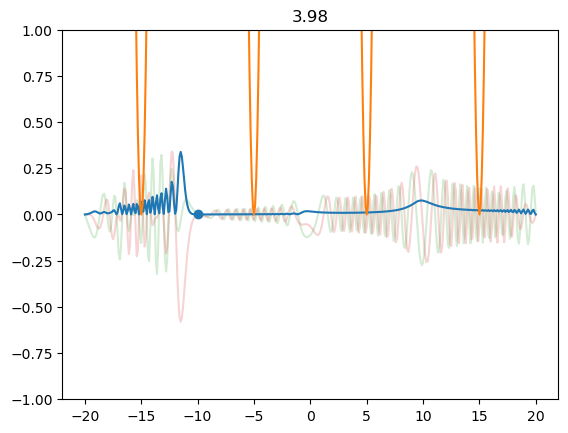

<Figure size 640x480 with 0 Axes>

In [16]:
x = linspace(-20,20,401)
dx = x[1]-x[0]
t = linspace(0,4,200001)
dt = t[1]-t[0]
k = linspace(-pi/dx, pi/dx, 401)
dk = k[1]-k[0]
n = linspace(0, len(x)-1, len(x), dtype=int)

x0 = -15
v0 = 10

Psi = 0 * im * x
Psi += exp(-1*(x-x0)**2)*exp(im*x*(v0))
Psi[0] = 0
Psi[-1] = 0

V = Psi*0
V = 25 + 25 * cos((2*pi/20)*2*x)
V[:1] = 1e6
V[-1:] = 1e6

Psi = Normalize(x,Psi)

r = x0
v = v0

fig, ax = plt.subplots()

#Psi2 = Normalize(k, x2k(x, k, Psi, n))

ax.plot(x,real(conj(Psi)*Psi))
ax.plot(x,V)
ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
ax.set_ylim(-1,1)
for i in range(len(t)):
    if (i%1000) == 0:
        clear_output(wait=True) 
        display(fig)            
        ax.clear()        
        time.sleep(0.0001)
        
    ddxxPsi = deriv2(x,Psi)
    Psi += (-im/hbar)*((((-hbar**2)/(2*m))*ddxxPsi)+(V*Psi))*dt/2
    Psi = Normalize(x, Psi)
    
    Psi2 = Normalize(k, x2k(x, k, Psi, n))
        
    Conv = x2k(x, k, Psi * V, n)
    Psi2 -= (im/hbar)*(( ((hbar**2)*(k**2)/(2*m))*Psi2 + Conv ))*dt/2
    
    Psi = Normalize(x, k2x(x, k, Psi2, n))
    
    v += -25 * (4*pi/20) * -sin(r*4*pi/20) * dt
    r += v * dt
    
#     Psi2 = Normalize(k, x2k(x, k, Psi, n))
    
    #print(t[i])
    if (i%1000) == 0:
        #ax.plot(x,Conv)
        ax.set_title("{:.2f}".format(t[i]))
        ax.plot(x,real(conj(Psi)*Psi))
        ax.plot(x,V)
        ax.plot(x,real(Psi), zorder=-1, alpha=0.2)
        ax.plot(x,imag(Psi), zorder=-1, alpha=0.2)
        ax.scatter(r, 0)
        ax.set_ylim(-1,1)
fig.clear()

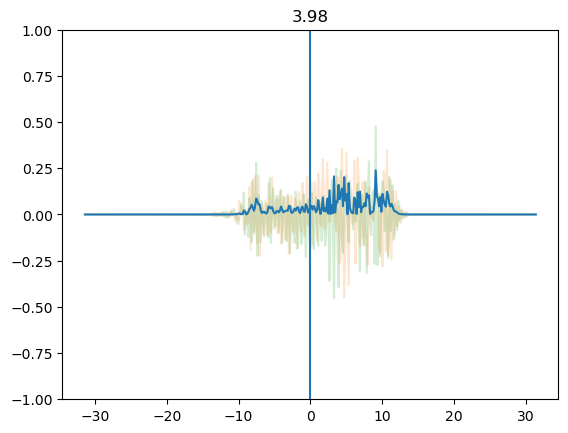

<Figure size 640x480 with 0 Axes>

In [17]:
x = linspace(-20,20,401)
dx = x[1]-x[0]
t = linspace(0,4,200001)
dt = t[1]-t[0]
k = linspace(-pi/dx, pi/dx, 401)
dk = k[1]-k[0]
n = linspace(0, len(x)-1, len(x), dtype=int)

x0 = -15
v0 = 10

Psi = 0 * im * x
Psi += exp(-1*(x-x0)**2)*exp(im*x*(v0))
Psi[0] = 0
Psi[-1] = 0

V = Psi*0
V = 25 + 25 * cos((2*pi/20)*2*x)
V[:1] = 1e6
V[-1:] = 1e6

Psi = Normalize(x,Psi)

r = x0
v = v0

fig, ax = plt.subplots()

Psi2 = Normalize(k, x2k(x, k, Psi, n))

ax.plot(k,real(conj(Psi2)*Psi2))
# ax.plot(x,V)
ax.plot(k,real(Psi2), zorder=-1, alpha=0.2)
ax.plot(k,imag(Psi2), zorder=-1, alpha=0.2)
ax.set_ylim(-1,1)
for i in range(len(t)):
    if (i%1000) == 0:
        clear_output(wait=True) 
        display(fig)            
        ax.clear()        
        time.sleep(0.0001)
        
    ddxxPsi = deriv2(x,Psi)
    Psi += (-im/hbar)*((((-hbar**2)/(2*m))*ddxxPsi)+(V*Psi))*dt/2
    Psi = Normalize(x, Psi)
    
    Psi2 = Normalize(k, x2k(x, k, Psi, n))
        
    Conv = x2k(x, k, Psi * V, n)
    Psi2 -= (im/hbar)*(( ((hbar**2)*(k**2)/(2*m))*Psi2 + Conv ))*dt/2
    
    Psi = Normalize(x, k2x(x, k, Psi2, n))
    
    v += -25 * (4*pi/20) * -sin(r*4*pi/20) * dt
    r += v * dt
    
    #print(t[i])
    if (i%1000) == 0:
        Psi2 = Normalize(k, x2k(x, k, Psi, n))
        ax.set_title("{:.2f}".format(t[i]))
        ax.plot(k,real(conj(Psi2)*Psi2))
#         ax.plot(x,V)
        ax.plot(k,real(Psi2), zorder=-1, alpha=0.2)
        ax.plot(k,imag(Psi2), zorder=-1, alpha=0.2)
        ax.vlines(v, -1, 1)
        ax.set_ylim(-1,1)
fig.clear()